# *Import Libraries*

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [76]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.shape

(2149, 35)

In [77]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [78]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [80]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [81]:
df = df.drop('DoctorInCharge', axis = 1)
df.shape

(2149, 34)

In [82]:
df.duplicated().sum()

0

In [83]:
display(df['Gender'].unique())
display(df['Ethnicity'].unique())
display(df['FamilyHistoryAlzheimers'].unique())
display(df['MemoryComplaints'].unique())
display(df['FamilyHistoryAlzheimers'].unique())

array([0, 1], dtype=int64)

array([0, 3, 1, 2], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

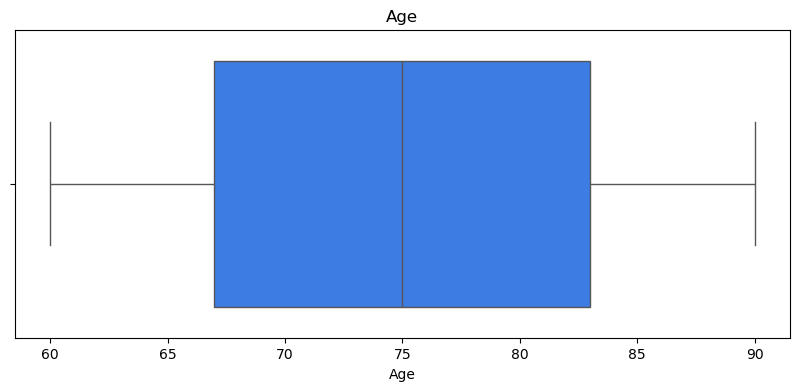

In [112]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="Age", data=df, color='#2176ff')
plt.title("Age")
plt.show()

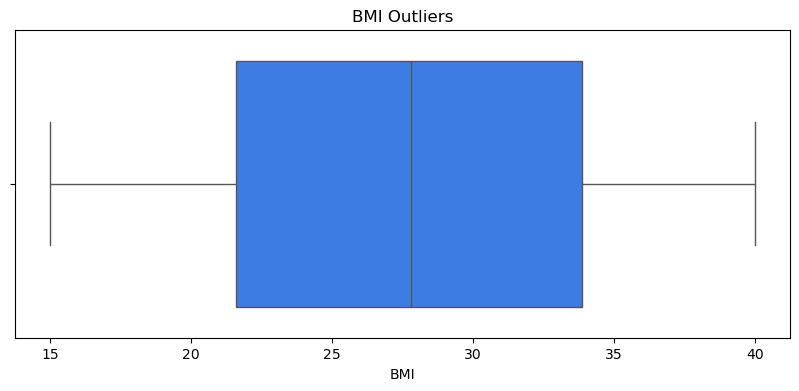

In [84]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="BMI", data=df, color='#2176ff')
plt.title("BMI Outliers")
plt.show()

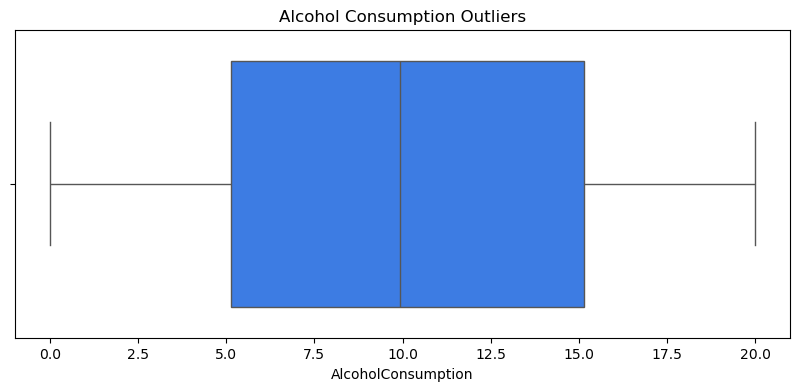

In [85]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="AlcoholConsumption", data=df, color='#2176ff')
plt.title("Alcohol Consumption Outliers")
plt.show()

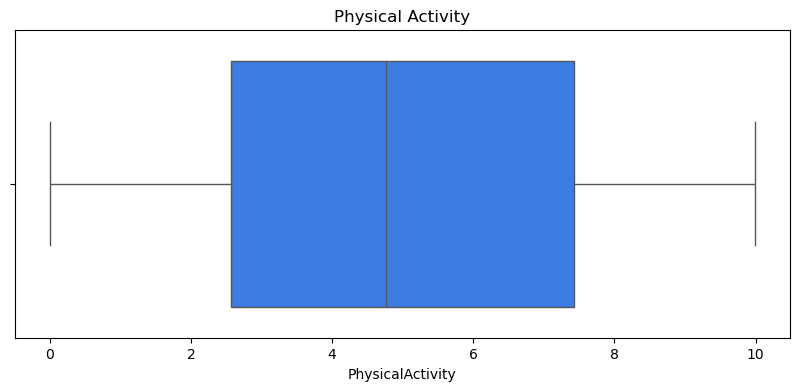

In [86]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="PhysicalActivity", data=df, color='#2176ff')
plt.title("Physical Activity")
plt.show()

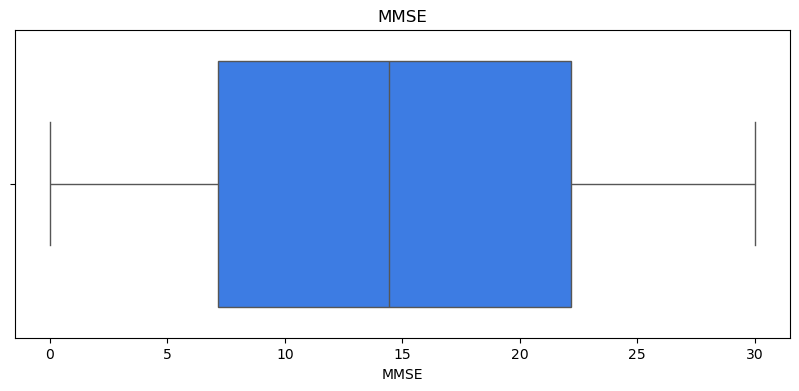

In [109]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="MMSE", data=df, color='#2176ff')
plt.title("MMSE")
plt.show()

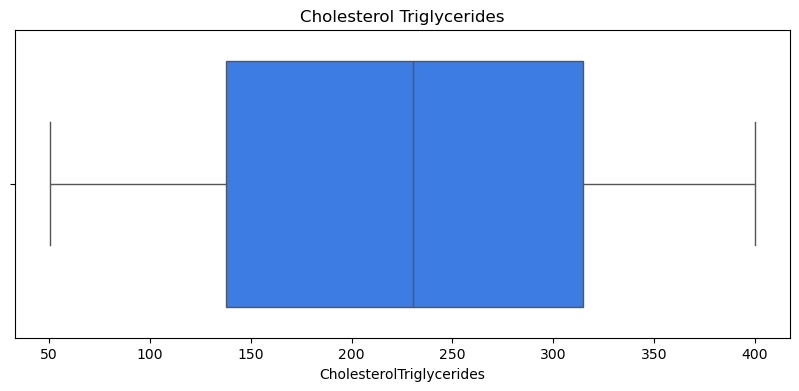

In [110]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="CholesterolTriglycerides", data=df, color='#2176ff')
plt.title("Cholesterol Triglycerides")
plt.show()

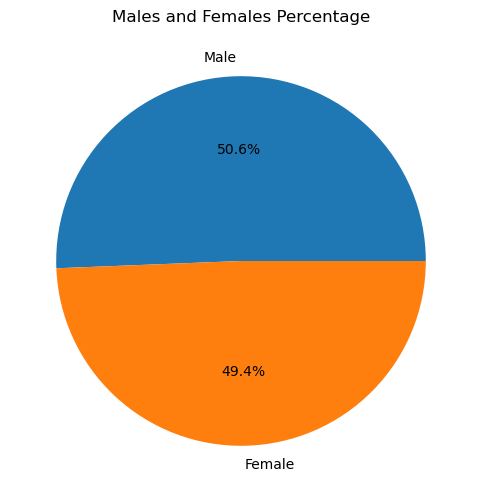

In [108]:
label = ['Male', 'Female']
plt.figure(figsize=(8,6))
plt.pie(df['Gender'].value_counts(), labels=label, autopct='%.1f%%')
plt.title('Males and Females Percentage')
plt.show()

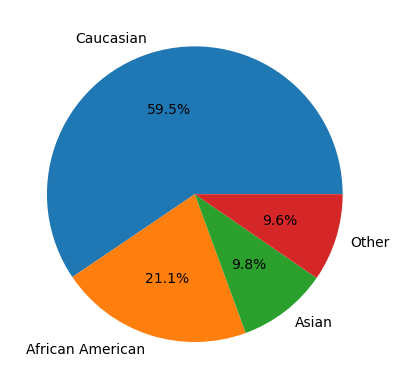

In [123]:
label = ['Caucasian', 'African American', 'Asian', 'Other']
plt.pie(df['Ethnicity'].value_counts(),labels=label, autopct='%.1f%%')
plt.show()

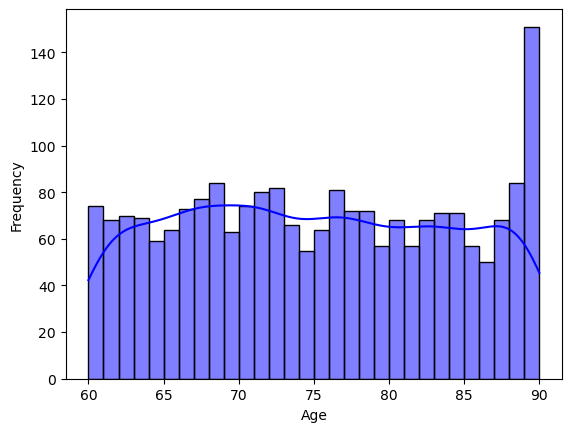

In [115]:
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

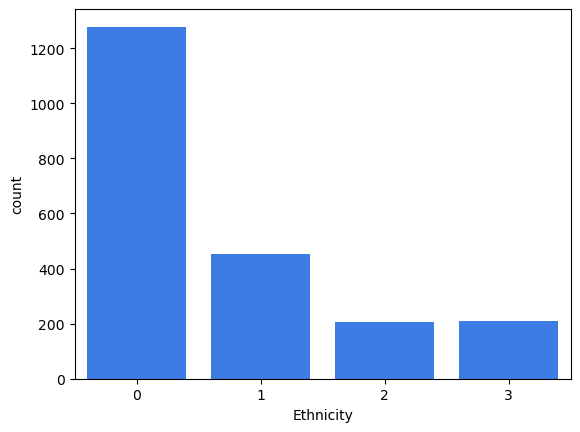

In [118]:
sns.countplot(x='Ethnicity', data=df, color='#2176ff')
plt.show()

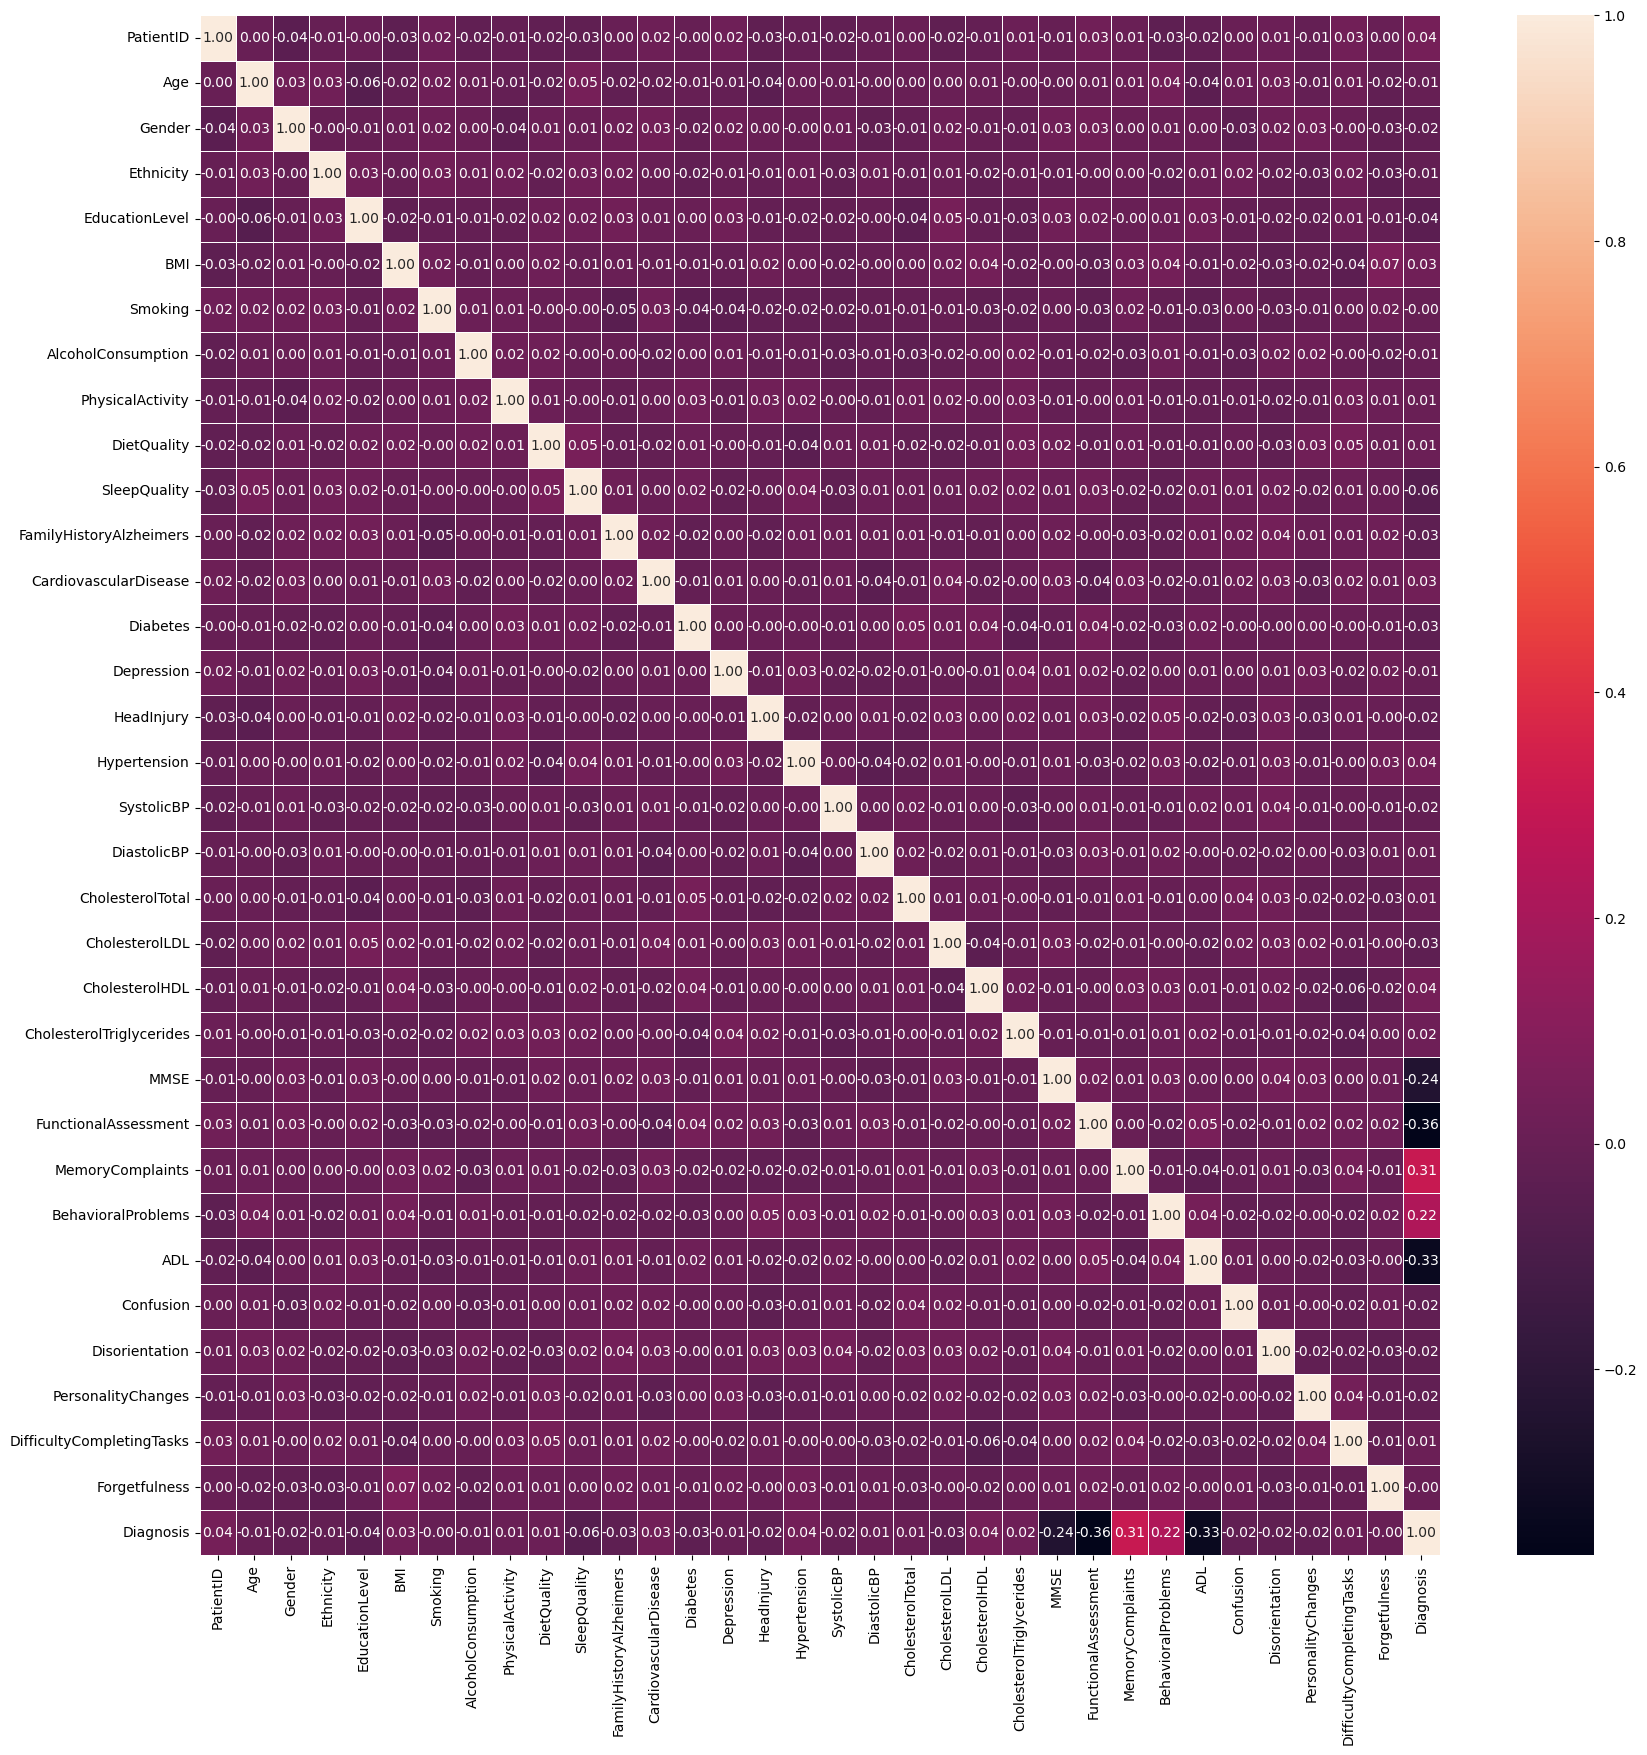

In [122]:
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

# *Modeling*

In [89]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1)
y = df['Diagnosis']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## - *Apply Decision Tree*

In [91]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 4,
    random_state = 42)

In [92]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [93]:
y_pred = clf.predict(X_test)

In [94]:
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train))*100, "%")
print("Test Accuracy: ", accuracy_score(y_test, y_pred)*100, "%")

Train Accuracy:  93.42023587833643 %
Test Accuracy:  91.07806691449815 %


## - *Apply Random Forest*

In [97]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_pred = rfc.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, rfc.predict(X_train))*100, "%")
print("Test Accuracy = ", accuracy_score(y_test, y_pred)*100, "%")

Train Accuracy:  100.0 %
Test Accuracy =  91.07806691449815 %
